In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv('/Users/shyampathak/Downloads/Electric_Vehicle_Population_Data.csv')


In [3]:
# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   VIN (1-10)  County       City State  Postal Code  Model Year   Make  \
0  WBY8P6C58K    King    Seattle    WA        98115        2019    BMW   
1  5YJSA1DN4D  Kitsap  Bremerton    WA        98312        2013  TESLA   
2  5YJSA1E26J    King       Kent    WA        98042        2018  TESLA   
3  WBY2Z2C54E    King   Bellevue    WA        98004        2014    BMW   
4  5YJXCDE23J    King   Bellevue    WA        98004        2018  TESLA   

     Model                   Electric Vehicle Type  \
0       I3          Battery Electric Vehicle (BEV)   
1  MODEL S          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3       I8  Plug-in Hybrid Electric Vehicle (PHEV)   
4  MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             153   
1           Clean Alternative Fuel Vehicle Eligible             208 

In [4]:
# Identifying missing data
print("\nMissing Data (True indicates missing):")
print(df.isna())


Missing Data (True indicates missing):
      VIN (1-10)  County   City  State  Postal Code  Model Year   Make  Model  \
0          False   False  False  False        False       False  False  False   
1          False   False  False  False        False       False  False  False   
2          False   False  False  False        False       False  False  False   
3          False   False  False  False        False       False  False  False   
4          False   False  False  False        False       False  False  False   
...          ...     ...    ...    ...          ...         ...    ...    ...   
4354       False   False  False  False        False       False  False  False   
4355       False   False  False  False        False       False  False  False   
4356       False   False  False  False        False       False  False  False   
4357       False   False  False  False        False       False  False  False   
4358       False   False  False  False        False       False  Fals

In [5]:
# Filtering out missing data (remove rows with any missing values)
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with missing data:")
print(df_dropped)



DataFrame after dropping rows with missing data:
      VIN (1-10)    County       City State  Postal Code  Model Year     Make  \
0     WBY8P6C58K      King    Seattle    WA        98115        2019      BMW   
1     5YJSA1DN4D    Kitsap  Bremerton    WA        98312        2013    TESLA   
2     5YJSA1E26J      King       Kent    WA        98042        2018    TESLA   
3     WBY2Z2C54E      King   Bellevue    WA        98004        2014      BMW   
4     5YJXCDE23J      King   Bellevue    WA        98004        2018    TESLA   
...          ...       ...        ...   ...          ...         ...      ...   
4353  1N4AZ0CPXD     Clark  Vancouver    WA        98685        2013   NISSAN   
4354  7PDSGABAXP      King    Seattle    WA        98103        2023   RIVIAN   
4355  YV4BR0CL5L      King   Bellevue    WA        98005        2020    VOLVO   
4356  KM8KRDAF8P      King  Shoreline    WA        98155        2023  HYUNDAI   
4357  3C3CFFGE9G  Thurston    Olympia    WA        98506   

In [6]:
# Filling missing data (e.g., with zero)
df_filled = df.fillna(0)
print("\nDataFrame after filling missing data with 0:")
print(df_filled)


DataFrame after filling missing data with 0:
      VIN (1-10)    County       City State  Postal Code  Model Year     Make  \
0     WBY8P6C58K      King    Seattle    WA        98115        2019      BMW   
1     5YJSA1DN4D    Kitsap  Bremerton    WA        98312        2013    TESLA   
2     5YJSA1E26J      King       Kent    WA        98042        2018    TESLA   
3     WBY2Z2C54E      King   Bellevue    WA        98004        2014      BMW   
4     5YJXCDE23J      King   Bellevue    WA        98004        2018    TESLA   
...          ...       ...        ...   ...          ...         ...      ...   
4354  7PDSGABAXP      King    Seattle    WA        98103        2023   RIVIAN   
4355  YV4BR0CL5L      King   Bellevue    WA        98005        2020    VOLVO   
4356  KM8KRDAF8P      King  Shoreline    WA        98155        2023  HYUNDAI   
4357  3C3CFFGE9G  Thurston    Olympia    WA        98506        2016     FIAT   
4358  5YJXCAE22M      King   Kirkland    WA        98033       

In [7]:
# Removing duplicates
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)



DataFrame after removing duplicates:
      VIN (1-10)    County       City State  Postal Code  Model Year     Make  \
0     WBY8P6C58K      King    Seattle    WA        98115        2019      BMW   
1     5YJSA1DN4D    Kitsap  Bremerton    WA        98312        2013    TESLA   
2     5YJSA1E26J      King       Kent    WA        98042        2018    TESLA   
3     WBY2Z2C54E      King   Bellevue    WA        98004        2014      BMW   
4     5YJXCDE23J      King   Bellevue    WA        98004        2018    TESLA   
...          ...       ...        ...   ...          ...         ...      ...   
4354  7PDSGABAXP      King    Seattle    WA        98103        2023   RIVIAN   
4355  YV4BR0CL5L      King   Bellevue    WA        98005        2020    VOLVO   
4356  KM8KRDAF8P      King  Shoreline    WA        98155        2023  HYUNDAI   
4357  3C3CFFGE9G  Thurston    Olympia    WA        98506        2016     FIAT   
4358  5YJXCAE22M      King   Kirkland    WA        98033        2021   

In [8]:
# Assuming 'Make', 'Model Year', and 'Electric Range' are suitable columns for hierarchical indexing
# Create a hierarchical index from 'Make' and 'Model Year' columns
hier_index = pd.MultiIndex.from_frame(df[['Make', 'Model Year']])


In [9]:
# Create a Series using the hierarchical index and 'Electric Range' column
series = pd.Series(df['Electric Range'].values, index=hier_index)


In [10]:
# Display the Series with hierarchical index
print("\nSeries with Hierarchical Index:")
print(series)



Series with Hierarchical Index:
Make     Model Year
BMW      2019          153
TESLA    2013          208
         2018          249
BMW      2014           14
TESLA    2018          238
                      ... 
RIVIAN   2023            0
VOLVO    2020           18
HYUNDAI  2023            0
FIAT     2016           84
TESLA    2021            0
Length: 4359, dtype: int64


In [11]:
# Selecting subsets of data at the outer level (Make)
print("\nData for Tesla:")
print(series['TESLA'])


Data for Tesla:
Model Year
2013    208
2018    249
2018    238
2020    322
2021      0
       ... 
2021      0
2020    291
2024      0
2021      0
2021      0
Length: 1976, dtype: int64


In [12]:
print("\nData for Nissan:")
print(series['NISSAN'])



Data for Nissan:
Model Year
2019    150
2014     84
2013     75
2016     84
2011     73
       ... 
2023      0
2015     84
2013     75
2017    107
2013     75
Length: 376, dtype: int64


In [13]:
# Selecting subsets of data at the inner level (Model Year) within an outer level
print("\nData for Tesla, Model Year 2020:")
print(series['TESLA', 2020])

print("\nData for Nissan, Model Year 2018:")
print(series['NISSAN', 2018])


Data for Tesla, Model Year 2020:
Make   Model Year
TESLA  2020          322
       2020          322
       2020          266
       2020          308
       2020          308
                    ... 
       2020          322
       2020          291
       2020          330
       2020          322
       2020          291
Length: 215, dtype: int64

Data for Nissan, Model Year 2018:
Make    Model Year
NISSAN  2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018          151
        2018         

/var/folders/ww/0srhmmdj3t58bkcxvmrc3vgr0000gn/T/ipykernel_13043/2047864111.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(series['TESLA', 2020])
/var/folders/ww/0srhmmdj3t58bkcxvmrc3vgr0000gn/T/ipykernel_13043/2047864111.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(series['NISSAN', 2018])


In [16]:
file_path = 'Electric_Vehicle_Population_Data.csv'
ev_data = pd.read_csv(file_path)

In [17]:
# Data preparation for line plot: Count the number of vehicles by model year
model_year_counts = ev_data['Model Year'].value_counts().sort_index()

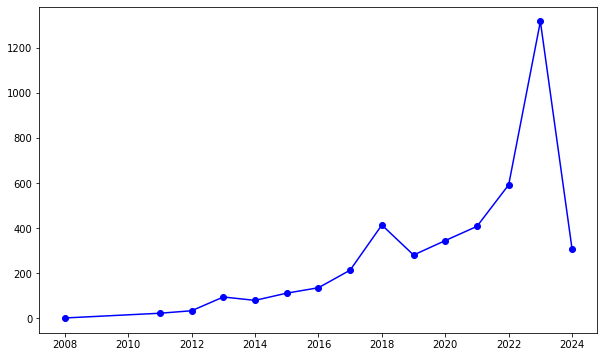

In [18]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(model_year_counts.index, model_year_counts.values, marker='o', linestyle='-', color='b')

Text(0, 0.5, 'Number of Vehicles')

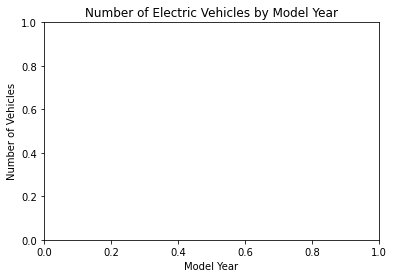

In [19]:
# Title and labels
plt.title('Number of Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')

([<matplotlib.axis.YTick at 0x119a87fd0>,
 [Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500')])

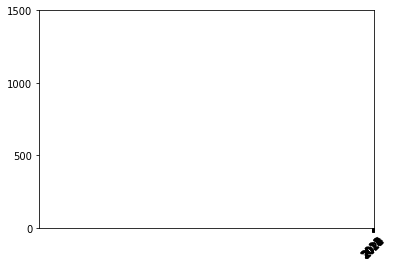

In [20]:
# Ticks and ticklabels
plt.xticks(model_year_counts.index, rotation=45)
plt.yticks(range(0, max(model_year_counts.values) + 500, 500))


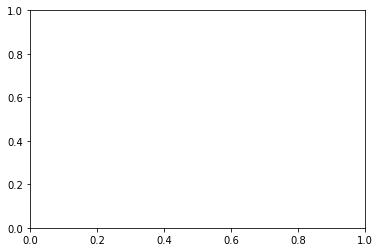

In [21]:
# Annotations for specific points
for year, count in model_year_counts.items():
    plt.annotate(f'{count}', xy=(year, count), xytext=(year, count + 100), ha='center')


In [22]:
# Save the plot
plt.tight_layout()
plt.savefig('line_plot_ev_model_year.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [23]:
# Data preparation for bar plots: Group by Make and Electric Vehicle Type
make_evtype_counts = ev_data.groupby(['Make', 'Electric Vehicle Type']).size().unstack().fillna(0)


<Axes: xlabel='Make'>

<Figure size 864x576 with 0 Axes>

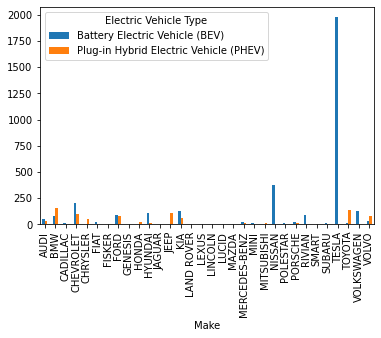

In [24]:
# Create grouped bar plot
plt.figure(figsize=(12, 8))
make_evtype_counts.plot(kind='bar')


Text(0, 0.5, 'Number of Vehicles')

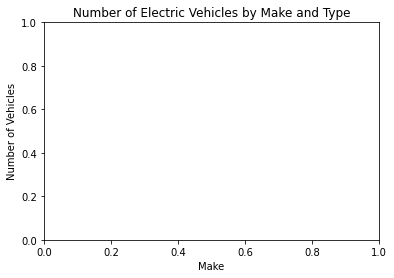

In [25]:
# Title and labels
plt.title('Number of Electric Vehicles by Make and Type')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')

In [26]:
# Save the plot
plt.tight_layout()
plt.savefig('grouped_bar_plot_ev_make_type.png')
plt.show()

<Figure size 432x288 with 0 Axes>

<Axes: xlabel='Make'>

<Figure size 864x576 with 0 Axes>

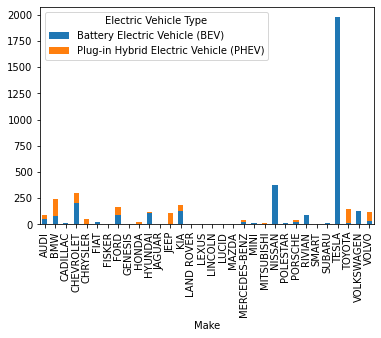

In [27]:
# Create stacked bar plot
plt.figure(figsize=(12, 8))
make_evtype_counts.plot(kind='bar', stacked=True)

Text(0, 0.5, 'Number of Vehicles')

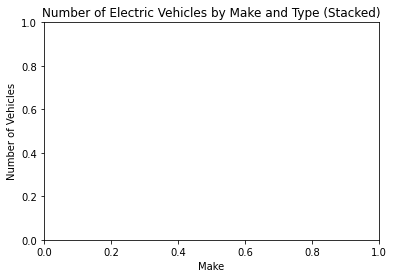

In [28]:
# Title and labels
plt.title('Number of Electric Vehicles by Make and Type (Stacked)')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')

In [29]:
# Save the plot
plt.tight_layout()
plt.savefig('stacked_bar_plot_ev_make_type.png')
plt.show()

<Figure size 432x288 with 0 Axes>